In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import bernoulli, norm
from scipy import stats
import math
np.random.seed(0)

### Hypothesis testing for Bernoulli distribution

$H_0: \pi_0 = 0.5$

$H_1: \pi_0 > 0.5$

$\alpha = 0.05$

In [15]:
# Create a sample with pi = 0.5

p = 0.5
n = 100
alpha = 0.05
X = bernoulli.rvs(p, size = n)

$ 
    \hat{\pi} = \bar{X} \\
    \hat{T} = \frac{(\bar{X} - \pi_1)\sqrt{n}}{\sqrt{\hat{\pi}(1 - \hat{\pi})}} \\
    R(\alpha) = (Z_\alpha, +\infty) \\
    \hat{p} = 1 - \phi(\hat{T})
$

Note: $\pi_0$ is the true value, $\pi_1$ is the value in the hypothesis

In [16]:
avg = sum(X) / n
T = (avg - 0.5) * math.sqrt(n) / math.sqrt(avg * (1 - avg))
pValue = 1 - norm.cdf(T)
print(pValue)
print(pValue >= alpha)
if pValue >= alpha:
    print("Since p-value >= alpha, we accept the null.")
else:
    print("Since p-value < alpha, we reject the null.")

0.5792753557783308
True
Since p-value >= alpha, we accept the null.


In [17]:
# do the same thing for 1000 times, record the number of time rejecting null
# significance level is 0.05 so it should be around 50

cnt = 0
nsample = 1000
pvl = []
for i in range(nsample):
    X = bernoulli.rvs(p, size = n)
    avg = sum(X) / n
    T = (avg - 0.5) * math.sqrt(n) / math.sqrt(avg * (1 - avg))
    pValue = 1 - norm.cdf(T)
    if (pValue < alpha):
        cnt += 1
    pvl.append(pValue)
print(f"Number of times rejecting H_0: {cnt}")

Number of times rejecting H_0: 38


##### When $H_0$ is true, $\hat{p}$ converges to U(0, 1). Otherwise it converges to 0

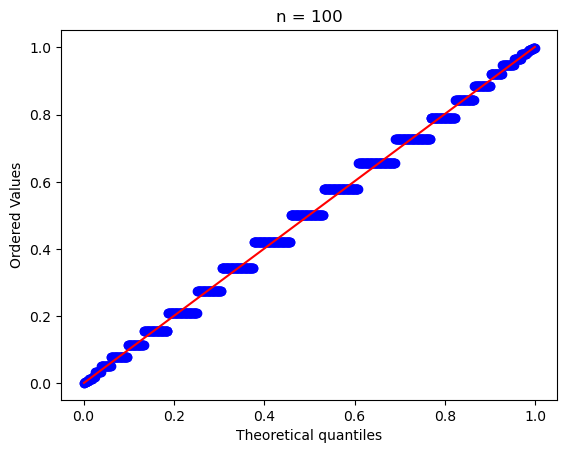

In [18]:
# Use a Q-Q plot to visualize it

fig = plt.figure()
ax = fig.add_subplot(111)
res = stats.probplot(pvl, dist = stats.uniform, plot = ax)
plt.title("n = 100")
plt.show()

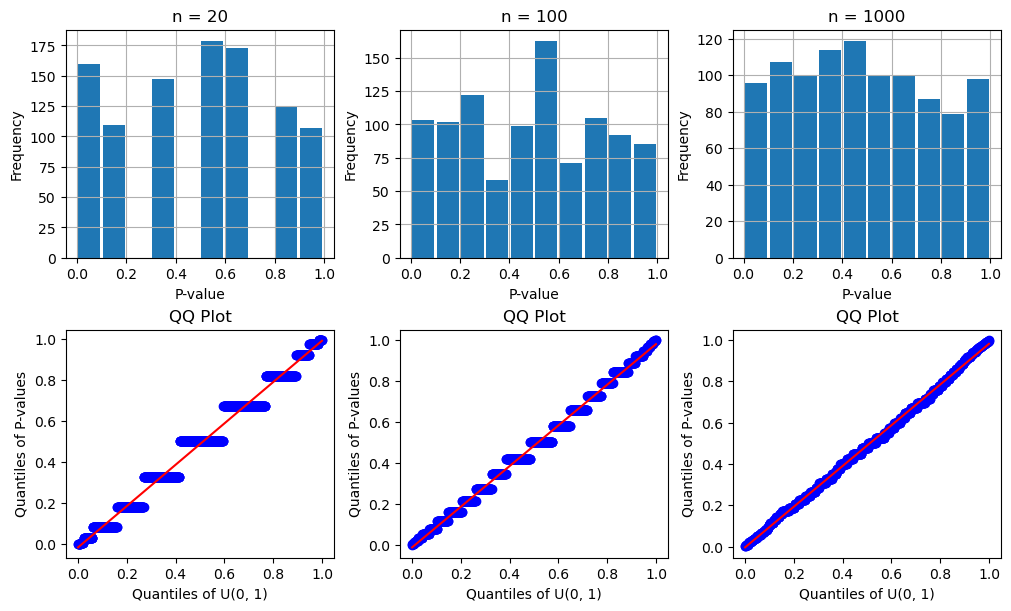

In [19]:
# As sample size increases, the distribution of p-values comes closer to U(0, 1)

size = [20, 100, 1000]
fig, axs = plt.subplots(2, 3, constrained_layout = True, figsize = (10, 6))
for idx, n in enumerate(size):
    pvl = []
    for i in range(nsample):
        X = bernoulli.rvs(p, size = n)
        avg = sum(X) / n
        T = (avg - 0.5) * math.sqrt(n) / math.sqrt(avg * (1 - avg))
        pValue = 1 - norm.cdf(T)
        pvl.append(pValue)
    axs[0][idx].hist(pvl, bins = 10, rwidth = 0.9)
    axs[0][idx].grid()
    axs[0][idx].set_title(f'n = {n}')
    axs[0][idx].set_ylabel("Frequency")
    axs[0][idx].set_xlabel("P-value")
    stats.probplot(pvl, dist = stats.uniform, plot = axs[1][idx])
    axs[1][idx].set_title("QQ Plot")
    axs[1][idx].set_ylabel("Quantiles of P-values")
    axs[1][idx].set_xlabel("Quantiles of U(0, 1)")
plt.show()

$
\begin{split}
    \beta &= P(T \not\in R(\alpha) | H_1) \\
          &= P(T < Z_{\alpha} | H_1) \\
          &= P(\frac{(\bar{X} - \pi_1)\sqrt{n}}{\sqrt{\pi_0(1 - \pi_0)}} < Z_{\alpha}  |  H_1) \\
          &= P(\frac{(\bar{X} - \pi_0)\sqrt{n}}{\sqrt{\pi_0(1 - \pi_0)}} < Z_{\alpha} - \frac{(\pi_0 - \pi_1)\sqrt{n}}{\sqrt{\pi_0(1 - \pi_0))}}  |  H_1) \\
          &= \phi(Z_{\alpha} - \frac{(\pi_0 - \pi_1)\sqrt{n}}{\sqrt{\pi_0(1 - \pi_0)}})
\end{split} 
$


Type II error ($\beta$) is monotically decreasing since:


- Since $1 > \pi_0 > 0.5$, $\pi_0(1 - \pi_0)$ is decreasing (checked by derivative), so $\sqrt{\pi_0(1 - \pi_0)}$ is also decreasing
- $(\pi_0 - \pi_1)\sqrt{n}$ is increasing ($\pi_1$ and $n$ are constants)
- Hence, $\frac{(\pi_0 - \pi_1)\sqrt{n}}{\sqrt{\pi_0(1 - \pi_0)}}$ is increasing, which makes $Z_{\alpha} - \frac{(\pi_0 - \pi_1)\sqrt{n}}{\sqrt{\pi_0(1 - \pi_0)}}$ decrease, and $\beta$ decrease.

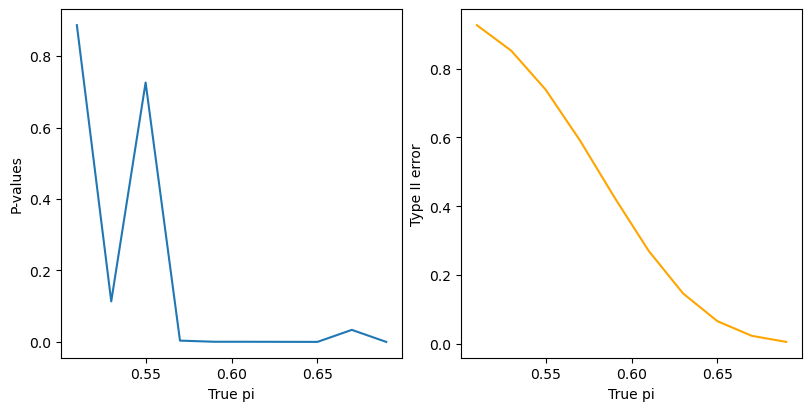

In [20]:
# Create samples with pi > 0.5, and visualize p-value and type II error

pis = np.arange(0.51, 0.71, 0.02)
pvl = []
beta = []
n = 100
alpha = 0.05
for pi in pis:
    X = bernoulli.rvs(pi, size = n)
    avg = sum(X) / n
    T = (avg - 0.5) * math.sqrt(n) / math.sqrt(avg * (1 - avg))
    pValue = 1 - norm.cdf(T)
    const = (pi - 0.5) * math.sqrt(n) / math.sqrt(pi * (1 - pi))
    pvl.append(pValue)
    beta.append(norm.cdf(-norm.ppf(alpha) - const))
    
fig, axs = plt.subplots(1, 2, constrained_layout = True, figsize = (8, 4))
axs[0].plot(pis, pvl)
axs[1].plot(pis, beta, color = 'orange')

axs[0].set_ylabel("P-values")
axs[0].set_xlabel("True pi")
axs[0].set_xticks(np.arange(0.55, 0.66, 0.05))

axs[1].set_ylabel("Type II error")
axs[1].set_xlabel("True pi")
axs[1].set_xticks(np.arange(0.55, 0.66, 0.05))